In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [0]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X = X.astype('float32')
X /= 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D # Convolutional layers
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation # Neural Network layers

from sklearn.model_selection import train_test_split

In [0]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
limits = np.linspace(0.1, 1, 10)

In [0]:
model = Sequential([
  Conv2D(28, (4, 4), activation='relu', input_shape=input_shape),
  AveragePooling2D((2, 2)),
  Conv2D(14, (4, 4)),
  MaxPool2D((2, 2)),

  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
epochs = 5
x_axis_values = [int(i+1) for i in range(epochs)]
train_accuracies = []
test_accuracies = []

for limit in limits:
  print(f'Using {limit:.0%} of data')
  label = f'{limit:.0%} train'
  limit = int(limit * X.shape[0])


  dataset_X, dataset_y = X[:limit], y[:limit]
  X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, shuffle=False)

  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

  training_history = model.fit(X_train, y_train, epochs=epochs)
  evaluation = model.evaluate(X_test, y_test)

  train_accuracies.append(training_history.history['accuracy'][-1])
  test_accuracies.append(evaluation[-1])
  print('\n')

Using 10% of data
Epoch 1/5
165/165 [==============================] - 3s 20ms/step - loss: 0.7775 - accuracy: 0.7594
Epoch 2/5
165/165 [==============================] - 3s 20ms/step - loss: 0.2623 - accuracy: 0.9244
Epoch 3/5
165/165 [==============================] - 3s 21ms/step - loss: 0.1917 - accuracy: 0.9429
Epoch 4/5
165/165 [==============================] - 3s 20ms/step - loss: 0.1413 - accuracy: 0.9549
Epoch 5/5
55/55 [==============================] - 0s 7ms/step - loss: 0.1517 - accuracy: 0.9537
Using 20% of data
Epoch 1/5
329/329 [==============================] - 7s 20ms/step - loss: 0.1328 - accuracy: 0.9611
Epoch 2/5
329/329 [==============================] - 6s 19ms/step - loss: 0.0932 - accuracy: 0.9725
Epoch 3/5
329/329 [==============================] - 7s 20ms/step - loss: 0.0764 - accuracy: 0.9771
Epoch 4/5
329/329 [==============================] - 6s 20ms/step - loss: 0.0584 - accuracy: 0.9814
Epoch 5/5
110/110 [==============================] - 1s 8ms/step - 

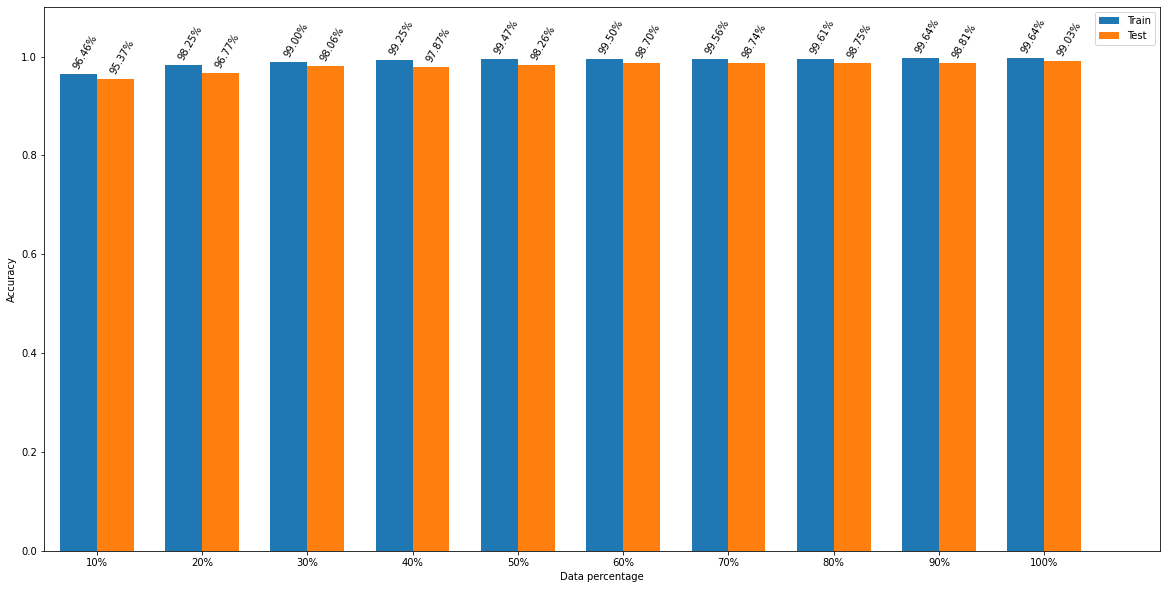

In [34]:
import matplotlib.pyplot as plt

labels = [f'{limit:.0%}' for limit in limits]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(7, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=60)


autolabel(rects1)
autolabel(rects2)

ax.set_xlabel('Data percentage')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ybound(0, 1.1)
ax.set_xbound(-0.5, 10.1)
fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

In [42]:
differences = np.array(train_accuracies) - np.array(test_accuracies)

array([0.01085711, 0.01476187, 0.00946027, 0.0138095 , 0.01203811,
       0.00796825, 0.00819051, 0.00857145, 0.00831741, 0.00607622])

In [43]:
differences.argsort()

array([9, 5, 6, 8, 7, 2, 0, 4, 3, 1])

# Conclusões

Comparado com os resultados das demais proporcões, os casos que houve menor taxa de generalização foram os casos com menor porcentagem dos dados: 10%, 20%, 40%. Isso ocorre pois quanto maior a complexidade do modelo maior é a necessidade de dados para que o modelo consiga extrair um conhecimento válido. Além disso, é necessário maior tempo de treinamento, devido à mesma razão citada anteoriormente